In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re  
import warnings
import os 
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
sns.set()

### Task 1 : Merge the 12 months of sales data into a single csv file

In [9]:
files = os.listdir('./Dataset/')
df = pd.DataFrame()
for file_name in files:
    file = pd.read_csv('./Dataset/' + file_name)
    df = pd.concat([df,file])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Task 2 : what was the best month for sales ? how much was earned that month ? 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### We can see from the above info that the Dtype of "Order Date" is "object". We will transform it to "Datetime".

In [10]:
#dropping the NAN values
df = df.dropna(how = 'any')

In [12]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [16]:
#We will use regex to choose the cells that contain data which can be transformed to "Datetime" format
df = df[~df['Order Date'].str.contains('Order.+')]

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [18]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [22]:
#We will apply function month for each cell in the "Order Date" column to get the month
#"date" is each cell in the "Order Date column"
df['month'] = df['Order Date'].apply(lambda date:date.month)

In [23]:
df['year'] = df['Order Date'].apply(lambda date:date.year)

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019


In [26]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [27]:
df['sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99


In [28]:
#We have 12 months, Therefore, "groupby" will give us 12 boxes. We will check the "sales" from each box and sum them up
sales = df.groupby('month')['sales'].sum()

<BarContainer object of 12 artists>

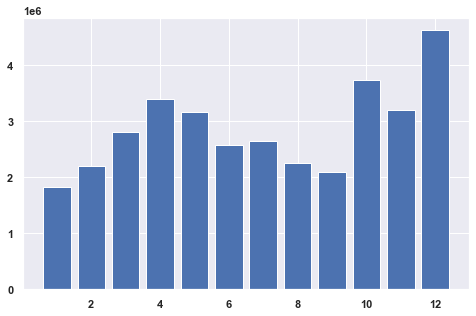

In [33]:
sales = sales.sort_values(ascending = False)
plt.bar(sales.index, sales.values)

### Task 3 : what city had the highest number of sales ? 

In [35]:
df['Purchase Address']

0                   917 1st St, Dallas, TX 75001
2              682 Chestnut St, Boston, MA 02215
3           669 Spruce St, Los Angeles, CA 90001
4           669 Spruce St, Los Angeles, CA 90001
5              333 8th St, Los Angeles, CA 90001
                          ...                   
11681     840 Highland St, Los Angeles, CA 90001
11682    216 Dogwood St, San Francisco, CA 94016
11683       220 12th St, San Francisco, CA 94016
11684     511 Forest St, San Francisco, CA 94016
11685     250 Meadow St, San Francisco, CA 94016
Name: Purchase Address, Length: 185950, dtype: object

### We can see from the above code that we need to split each cell using ','. Then, we need to get "Dallas" and "TX". However, "TX" is part of "TX 75001". So, we need to also split them using " " and take "TX" alone. Finally, we will combine "Dallas" and "TX". We will do this for each cell.

In [37]:
df['city'] = df['Purchase Address'].apply(lambda x : x.split(',')[-2] +' '+ x.split(',')[-1].split(' ')[-2])

In [38]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles CA


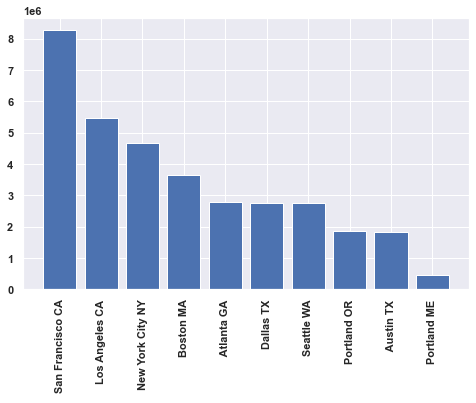

In [41]:
city_sales = df.groupby('city')['sales'].sum().sort_values(ascending = False)
plt.bar(city_sales.index,city_sales.values)
plt.xticks(rotation = 90)
plt.show()

### Task 4 : what time should we display advertisements to maximize of customer's buying product ? 

In [42]:
df['hour'] = df['Order Date'].apply(lambda date:date.hour)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles CA,9


<AxesSubplot:xlabel='hour', ylabel='Density'>

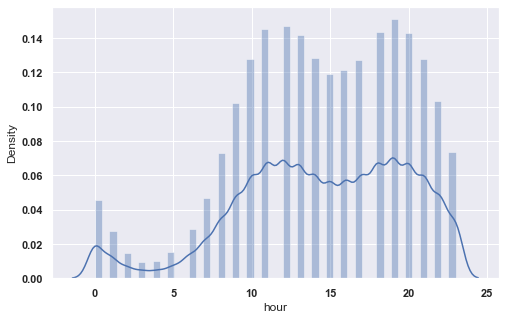

In [47]:
sns.distplot(df['hour'])

### Task 5 : what products are most often sold together ?  

In [51]:
#Get the duplicated orders. Same "Order ID" means that these orders were bought together.
new_df = df[df['Order ID'].duplicated(keep = False)]

In [62]:
products = new_df.groupby('Order ID')['Product'].apply(lambda x : ','.join(x))

In [65]:
from itertools import combinations
from collections import Counter

In [84]:
#If x contains [1,2,3] then combinations(x,2) will have [1,2],[1,3],[2,3]
#If x contains [1,2,3] then Counter(combinations([1,2,3],2)) will output Counter({(1, 2): 1, (1, 3): 1, (2, 3): 1})
#If x contains [1,2,3] then count.update(Counter(combinations([1,2,3],2))) in a loop for 7136 times will output Counter({(1, 2): 7136, (1, 3): 7136, (2, 3): 7136})
#The above code causes a problem; as it will see [1,2] as something different than [2,1]. Therefore, we need to sort x
count = Counter()
for i in products.values:
    x = i.split(',')
    x = sorted(x)
    count.update(Counter(combinations(x,2)))
most_common = count.most_common(10)

In [85]:
most_common

[(('Lightning Charging Cable', 'iPhone'), 1015),
 (('Google Phone', 'USB-C Charging Cable'), 999),
 (('Wired Headphones', 'iPhone'), 462),
 (('Google Phone', 'Wired Headphones'), 423),
 (('Apple Airpods Headphones', 'iPhone'), 373),
 (('USB-C Charging Cable', 'Vareebadd Phone'), 368),
 (('Bose SoundSport Headphones', 'Google Phone'), 228),
 (('USB-C Charging Cable', 'Wired Headphones'), 205),
 (('Vareebadd Phone', 'Wired Headphones'), 149),
 (('Lightning Charging Cable', 'Wired Headphones'), 129)]

### Task 6 : what product sold the most ? why do you think it sold the most ? 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,year,sales,city,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles CA,9
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,2019,8.97,Los Angeles CA,20
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,2019,700.00,San Francisco CA,16
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,2019,700.00,San Francisco CA,7
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,2019,379.99,San Francisco CA,17


In [93]:
product_quantity_sorted = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending = False)
print(product_quantity_sorted)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64


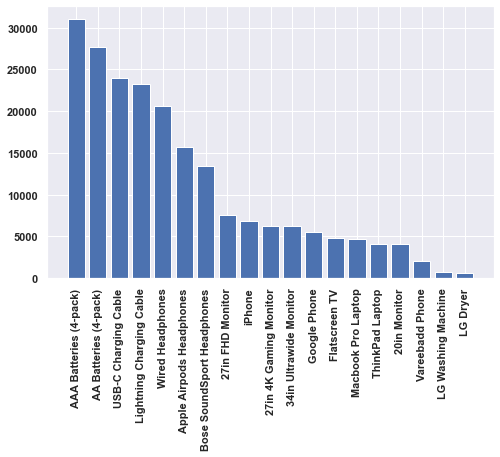

In [95]:
plt.bar(product_quantity_sorted.index,product_quantity_sorted.values)
plt.xticks(rotation = 90)
plt.show()

In [94]:
product_price_sorted = df.groupby('Product')['Price Each'].mean().sort_values()
print(product_price_sorted)

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64


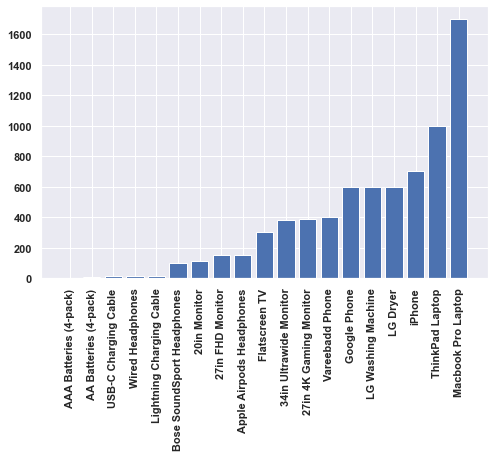

In [96]:
plt.bar(product_price_sorted.index,product_price_sorted.values)
plt.xticks(rotation = 90)
plt.show()

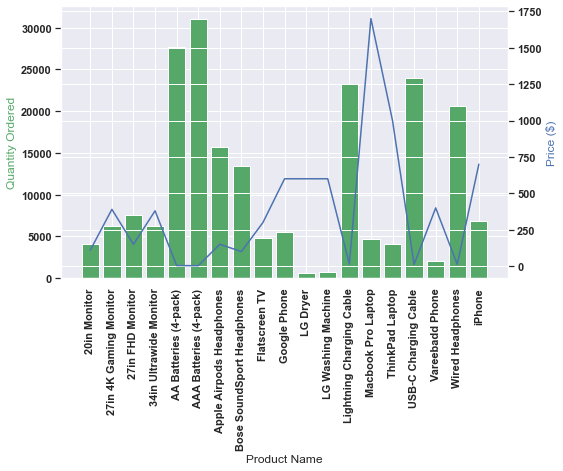

In [102]:
product_quantity = df.groupby('Product')['Quantity Ordered'].sum()
product_price = df.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_quantity.index, product_quantity.values, color='g')
ax2.plot(product_quantity.index, product_price.values, color='b')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product_quantity.index,rotation = 90)
fig.show()

### We can see that there is an inverse realtion between the prices and quantity. This means that as the price of an item decreases, set item is bought more. We can see that the most bought item is "AAA Batteries (4-pack)" which costs the least among all the other items.